In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_ABS.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.042424,#VALUE!,#VALUE!,0.492825,0.592149,0.576450,0.738316,0.411216,0.554485,0.367785,0.483998,0.296604,0.406063,0.181587,0.370326,0.323947,0.773659,4
1,1997-02-28 00:00:00,0.030303,#VALUE!,#VALUE!,0.578927,0.558017,0.514660,0.624385,0.395695,0.415181,0.289185,0.404881,0.278218,0.374875,0.161709,0.338374,0.319785,0.783264,4
2,1997-03-31 00:00:00,0.000000,#VALUE!,#VALUE!,0.580438,0.872439,0.375946,0.569335,0.390152,0.488696,0.212427,0.369817,0.252937,0.376553,0.251378,0.443947,0.315132,0.745390,4
3,1997-04-30 00:00:00,0.024242,#VALUE!,#VALUE!,0.344789,0.347304,0.305958,0.347329,0.290743,0.310726,0.209971,0.260192,0.252681,0.305611,0.243253,0.382426,0.277057,0.639667,4
4,1997-05-31 00:00:00,0.042424,#VALUE!,#VALUE!,0.246601,0.439709,0.341267,0.257878,0.232354,0.301562,0.217954,0.296403,0.299157,0.361117,0.265888,0.431798,0.222821,0.677654,4


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,277.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.384531,0.496887,0.499424,0.470617,0.492462,0.480718,0.500017,0.489680,0.492247,0.481544,0.484984,0.495937,0.532766,2.55914
std,0.255453,0.250317,0.183671,0.252012,0.194628,0.242491,0.212772,0.246996,0.213931,0.244801,0.213747,0.269899,0.216243,1.08418
min,0.000000,0.000000,0.000000,-0.581118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.181818,0.375000,0.375000,0.377956,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.424237,2.00000
50%,0.327273,0.502995,0.487146,0.472931,0.492441,0.471254,0.507368,0.490169,0.499027,0.496155,0.491617,0.549094,0.549190,3.00000
75%,0.509091,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.707061,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               221 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 85th percentile (top 15%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 85th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.85) # every data point over the 85th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.539393939


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.649403,0.622263,0.500192,0.632122,0.488860,0.641423,0.491796,0.638979,0.483244,0.563737,0.389147,0.640782,0.460575,1.939394
std,0.119746,0.298393,0.164060,0.259504,0.177756,0.262410,0.193767,0.267871,0.200641,0.219174,0.200452,0.218272,0.203047,1.087985
min,0.545455,0.000000,0.203199,0.000000,0.047883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003673,0.030134,1.000000
25%,0.557576,0.437106,0.384710,0.514320,0.382434,0.540643,0.387937,0.521578,0.423611,0.497896,0.248964,0.550563,0.340593,1.000000
50%,0.593939,0.625000,0.508891,0.680248,0.544413,0.640735,0.520117,0.644918,0.497199,0.625000,0.388760,0.656097,0.464136,2.000000
75%,0.709091,0.848834,0.636498,0.785200,0.614203,0.801620,0.589541,0.823672,0.529673,0.682603,0.491148,0.741185,0.535055,2.000000
max,0.987879,1.000000,0.844141,1.000000,0.772805,1.000000,0.850337,1.000000,0.911122,0.979469,0.804748,1.000000,0.879829,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 3-mo (Treasury)  33.0  0.622263  0.298393  0.051943   
 2                         combined  66.0  0.635833  0.226010  0.027820   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.516458  0.728068  
 2   0.580273  0.691393  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.0271
 1                              Degrees of freedom =   64.0000
 2                                               t =    0.4849
 3                           Two side test p value =    0.6294
 4                          Difference < 0 p value =    0.6853
 5                          Difference > 0 p value =    0.3147
 6                                       Cohen's d =    0.1194
 7                                       Hedge's g =    0.1180
 8                        

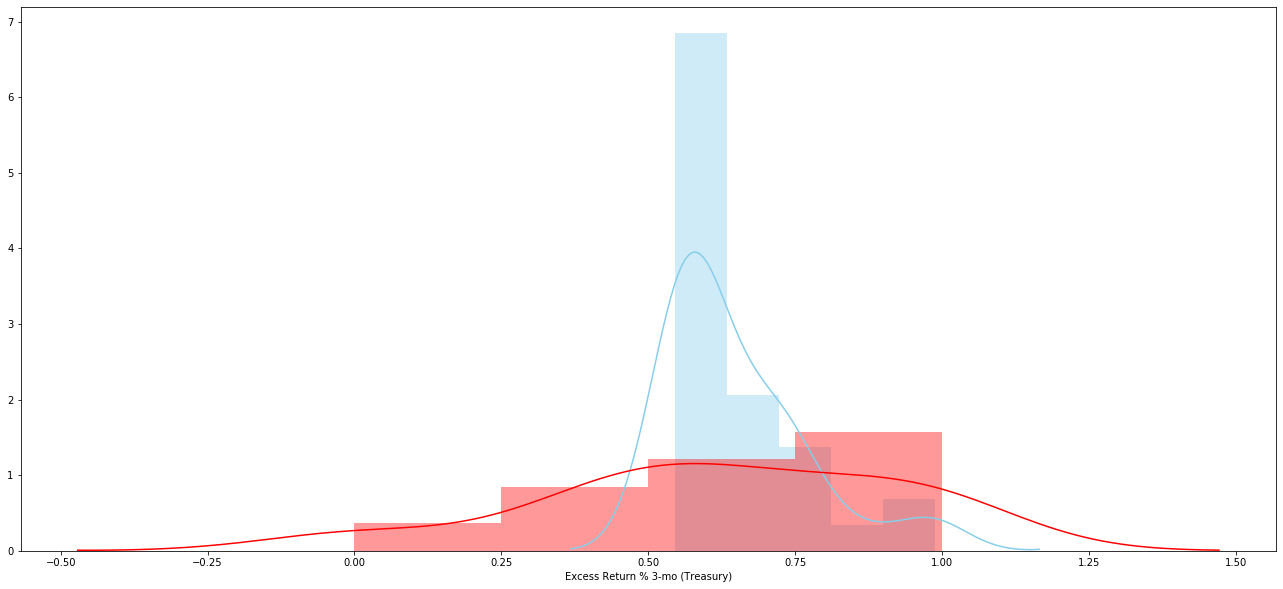

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  33.0  0.649403  0.119746  0.020845   0.606943   
 1  Excess Return % 3-mo (Agg)  33.0  0.500192  0.164060  0.028559   0.442019   
 2                    combined  66.0  0.574797  0.161126  0.019833   0.535188   
 
    Interval  
 0  0.691863  
 1  0.558365  
 2  0.614407  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.1492
 1                             Degrees of freedom =   64.0000
 2                                              t =    4.2201
 3                          Two side test p value =    0.0001
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.0389
 7                                      Hedge's g =    1.0267
 8                                  Glass's delta =    

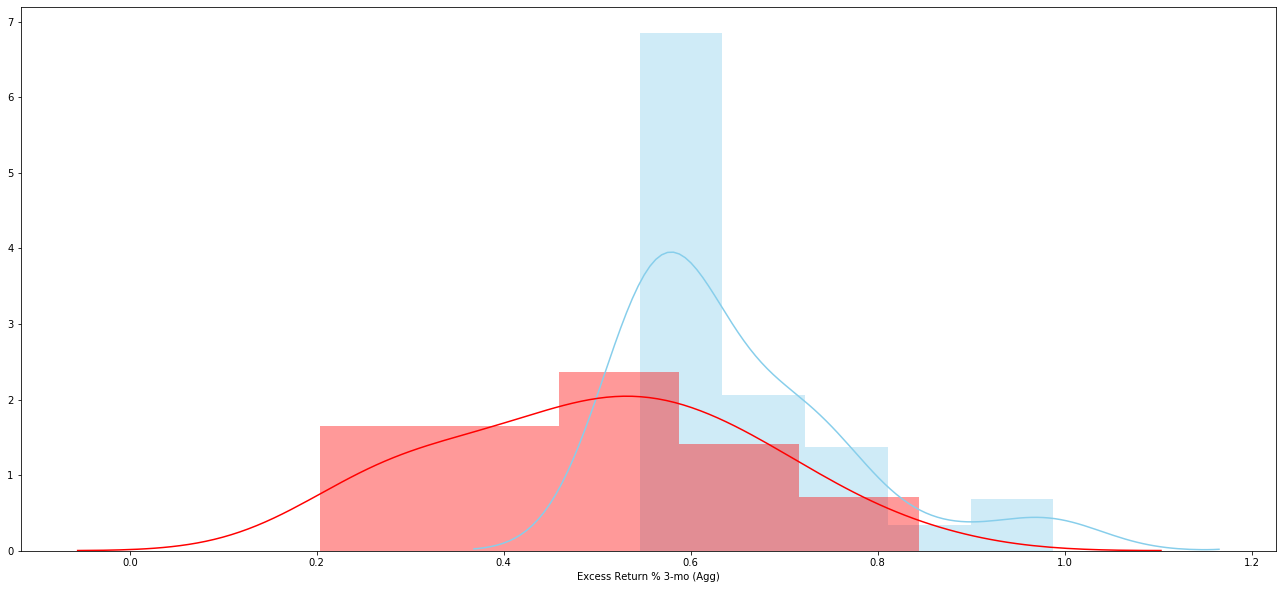

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 6-mo (Treasury)  33.0  0.632122  0.259504  0.045174   
 2                         combined  66.0  0.640763  0.200719  0.024707   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.540106  0.724138  
 2   0.591420  0.690106  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.0173
 1                              Degrees of freedom =   64.0000
 2                                               t =    0.3473
 3                           Two side test p value =    0.7295
 4                          Difference < 0 p value =    0.6353
 5                          Difference > 0 p value =    0.3647
 6                                       Cohen's d =    0.0855
 7                                       Hedge's g =    0.0845
 8                        

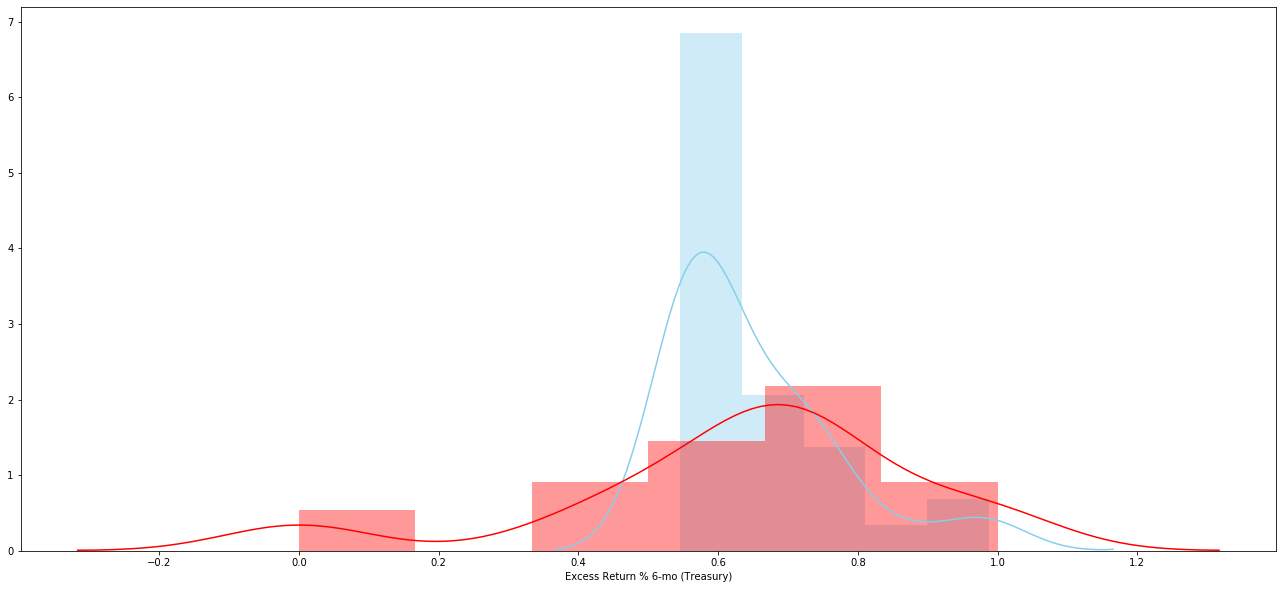

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  33.0  0.649403  0.119746  0.020845   0.606943   
 1  Excess Return % 6-mo (Agg)  33.0  0.488860  0.177756  0.030943   0.425830   
 2                    combined  66.0  0.569132  0.170756  0.021019   0.527155   
 
    Interval  
 0  0.691863  
 1  0.551890  
 2  0.611109  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.1605
 1                             Degrees of freedom =   64.0000
 2                                              t =    4.3030
 3                          Two side test p value =    0.0001
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.0593
 7                                      Hedge's g =    1.0469
 8                                  Glass's delta =    

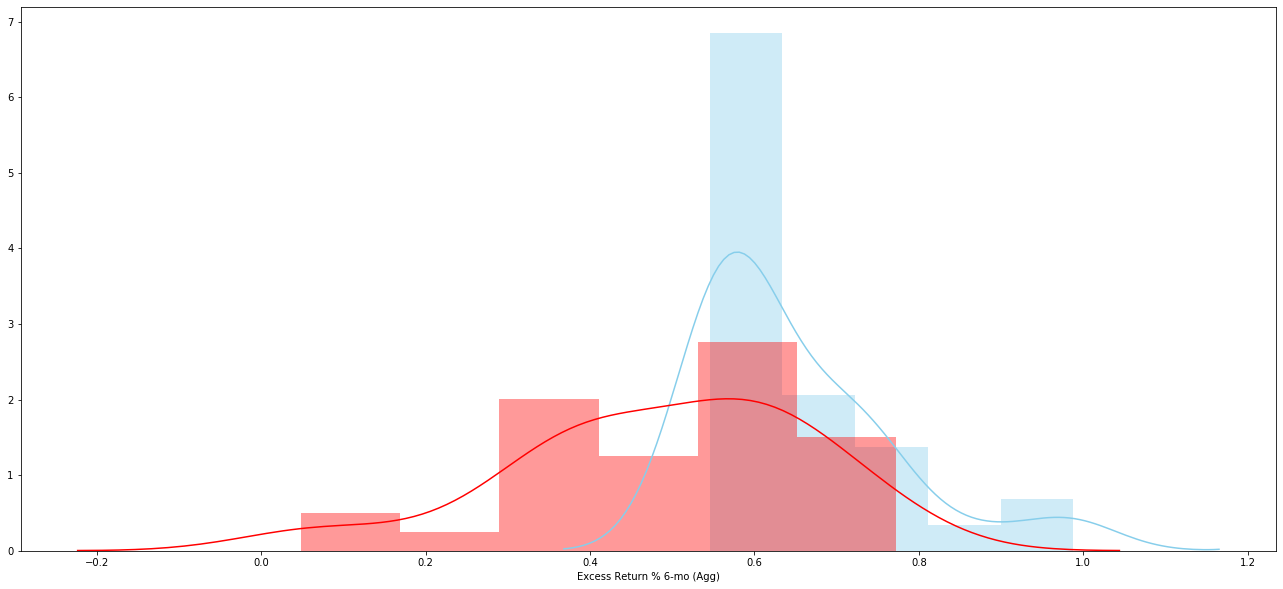

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 9-mo (Treasury)  33.0  0.641423  0.262410  0.045680   
 2                         combined  66.0  0.645413  0.202423  0.024917   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.548376  0.734469  
 2   0.595651  0.695175  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.0080
 1                              Degrees of freedom =   64.0000
 2                                               t =    0.1589
 3                           Two side test p value =    0.8742
 4                          Difference < 0 p value =    0.5629
 5                          Difference > 0 p value =    0.4371
 6                                       Cohen's d =    0.0391
 7                                       Hedge's g =    0.0387
 8                        

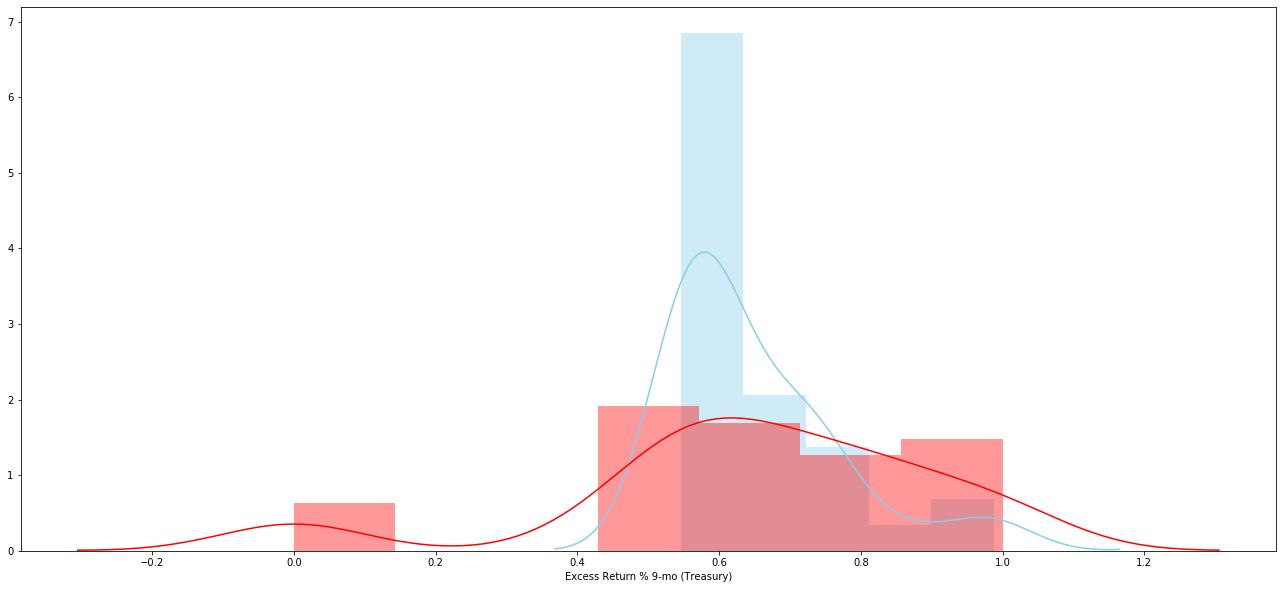

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  33.0  0.649403  0.119746  0.020845   0.606943   
 1  Excess Return % 9-mo (Agg)  33.0  0.491796  0.193767  0.033730   0.423090   
 2                    combined  66.0  0.570600  0.178462  0.021967   0.526728   
 
    Interval  
 0  0.691863  
 1  0.560503  
 2  0.614471  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.1576
 1                             Degrees of freedom =   64.0000
 2                                              t =    3.9748
 3                          Two side test p value =    0.0002
 4                         Difference < 0 p value =    0.9999
 5                         Difference > 0 p value =    0.0001
 6                                      Cohen's d =    0.9785
 7                                      Hedge's g =    0.9670
 8                                  Glass's delta =    

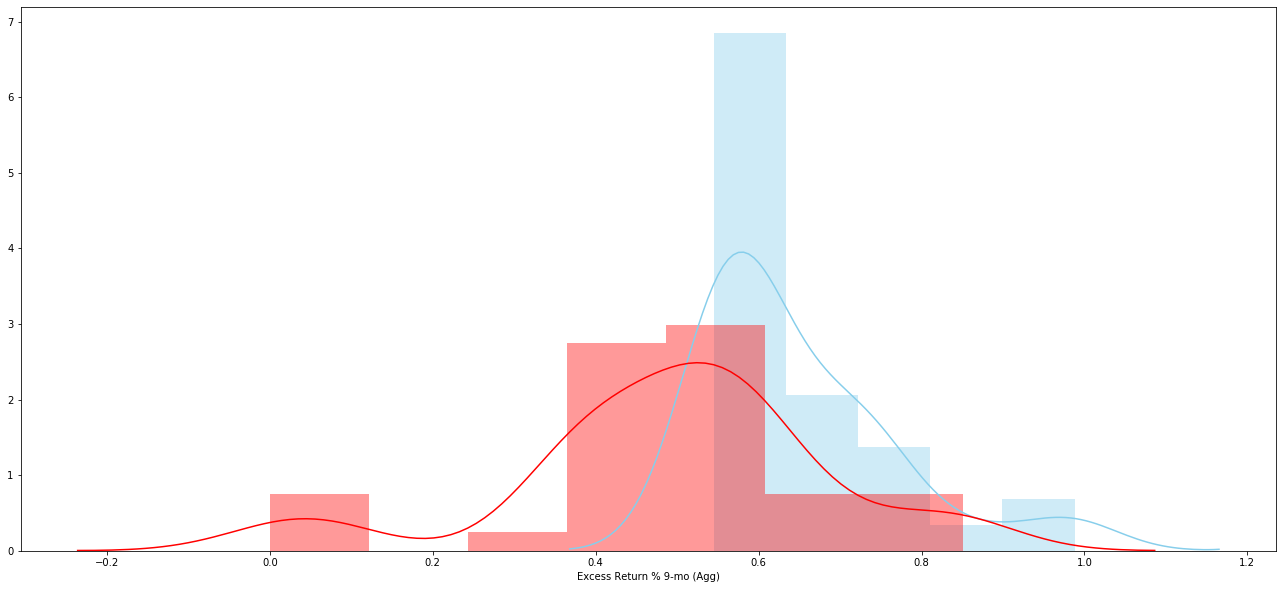

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 12-mo (Treasury)  33.0  0.638979  0.267871  0.046630   
 2                          combined  66.0  0.644191  0.205943  0.025350   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.543996  0.733962  
 2   0.593564  0.694818  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.0104
 1                              Degrees of freedom =   64.0000
 2                                               t =    0.2041
 3                           Two side test p value =    0.8389
 4                          Difference < 0 p value =    0.5805
 5                          Difference > 0 p value =    0.4195
 6                                       Cohen's d =    0.0502
 7                                       Hedge's g =    0.0497
 8                    

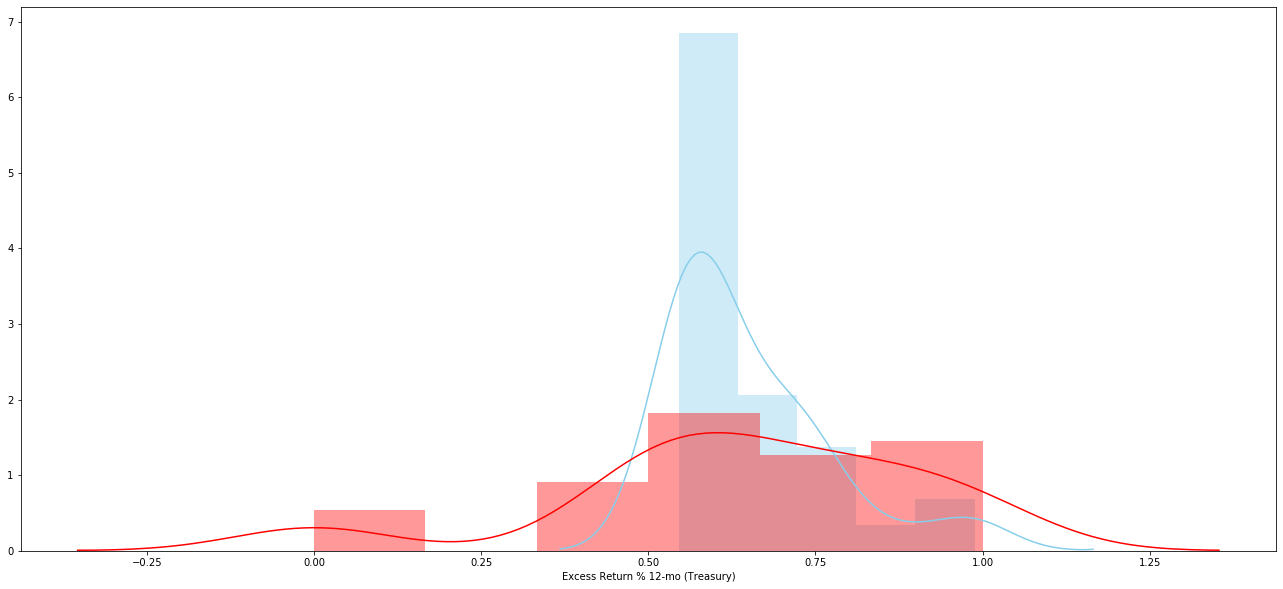

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  33.0  0.649403  0.119746  0.020845   0.606943   
 1  Excess Return % 12-mo (Agg)  33.0  0.483244  0.200641  0.034927   0.412100   
 2                     combined  66.0  0.566323  0.184082  0.022659   0.521070   
 
    Interval  
 0  0.691863  
 1  0.554388  
 2  0.611577  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.1662
 1                              Degrees of freedom =   64.0000
 2                                               t =    4.0851
 3                           Two side test p value =    0.0001
 4                          Difference < 0 p value =    0.9999
 5                          Difference > 0 p value =    0.0001
 6                                       Cohen's d =    1.0057
 7                                       Hedge's g =    0.9938
 8                                   Glass

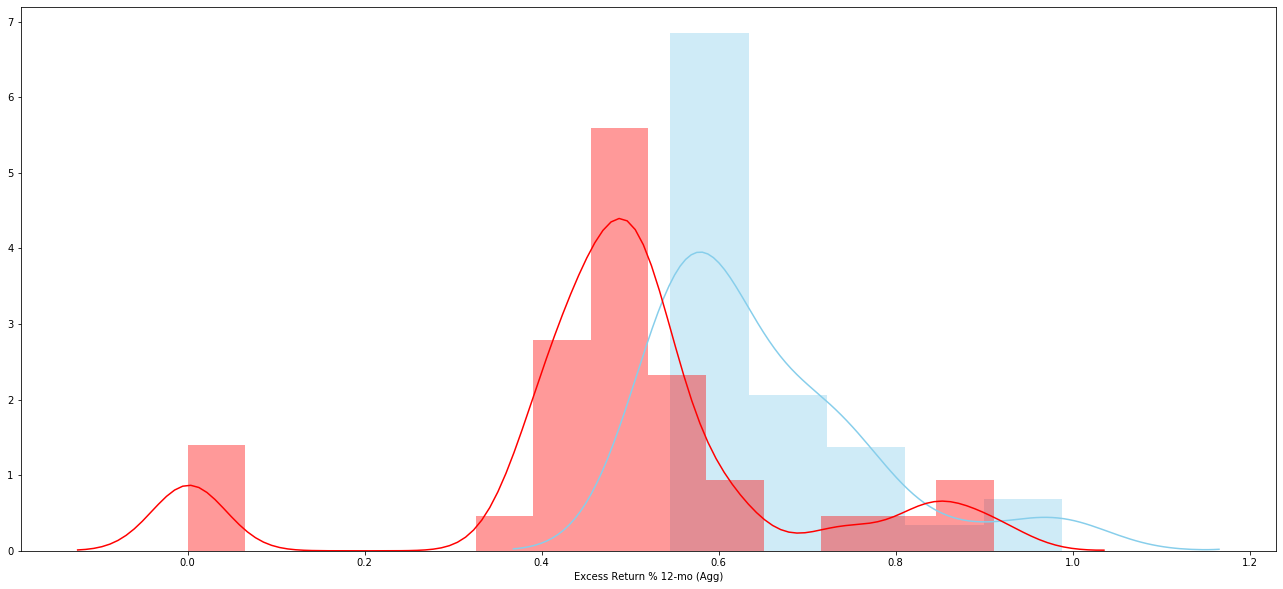

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 24-mo (Treasury)  33.0  0.563737  0.219174  0.038153   
 2                          combined  66.0  0.606570  0.180475  0.022215   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.486021  0.641452  
 2   0.562204  0.650936  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.0857
 1                              Degrees of freedom =   64.0000
 2                                               t =    1.9704
 3                           Two side test p value =    0.0531
 4                          Difference < 0 p value =    0.9734
 5                          Difference > 0 p value =    0.0266
 6                                       Cohen's d =    0.4851
 7                                       Hedge's g =    0.4794
 8                    

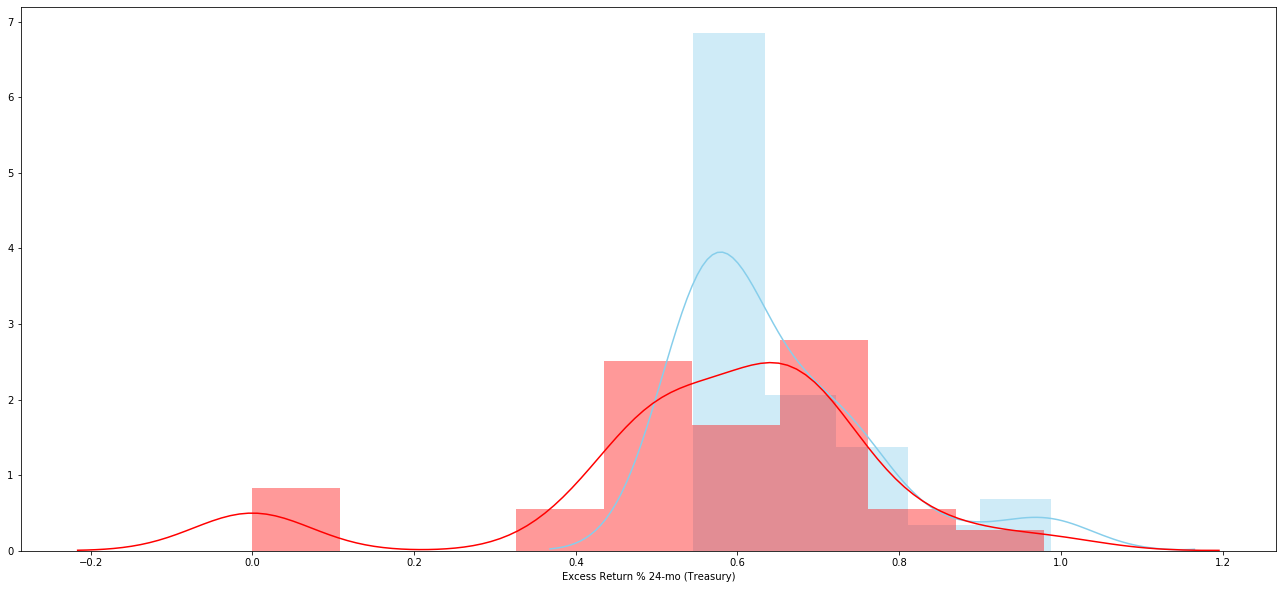

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  33.0  0.649403  0.119746  0.020845   0.606943   
 1  Excess Return % 24-mo (Agg)  33.0  0.389147  0.200452  0.034894   0.318070   
 2                     combined  66.0  0.519275  0.209844  0.025830   0.467689   
 
    Interval  
 0  0.691863  
 1  0.460224  
 2  0.570861  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.2603
 1                              Degrees of freedom =   64.0000
 2                                               t =    6.4029
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.5763
 7                                       Hedge's g =    1.5578
 8                                   Glass

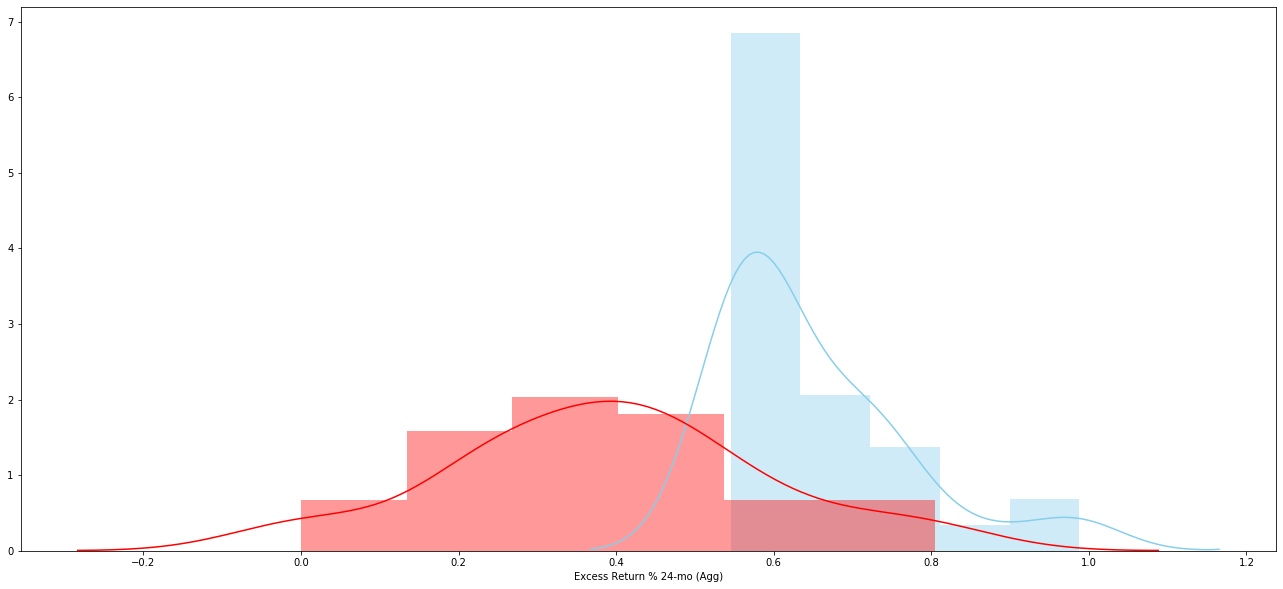

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 36-mo (Treasury)  33.0  0.640782  0.218272  0.037996   
 2                          combined  66.0  0.645093  0.174737  0.021509   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.563386  0.718178  
 2   0.602137  0.688048  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.0086
 1                              Degrees of freedom =   64.0000
 2                                               t =    0.1989
 3                           Two side test p value =    0.8430
 4                          Difference < 0 p value =    0.5785
 5                          Difference > 0 p value =    0.4215
 6                                       Cohen's d =    0.0490
 7                                       Hedge's g =    0.0484
 8                    

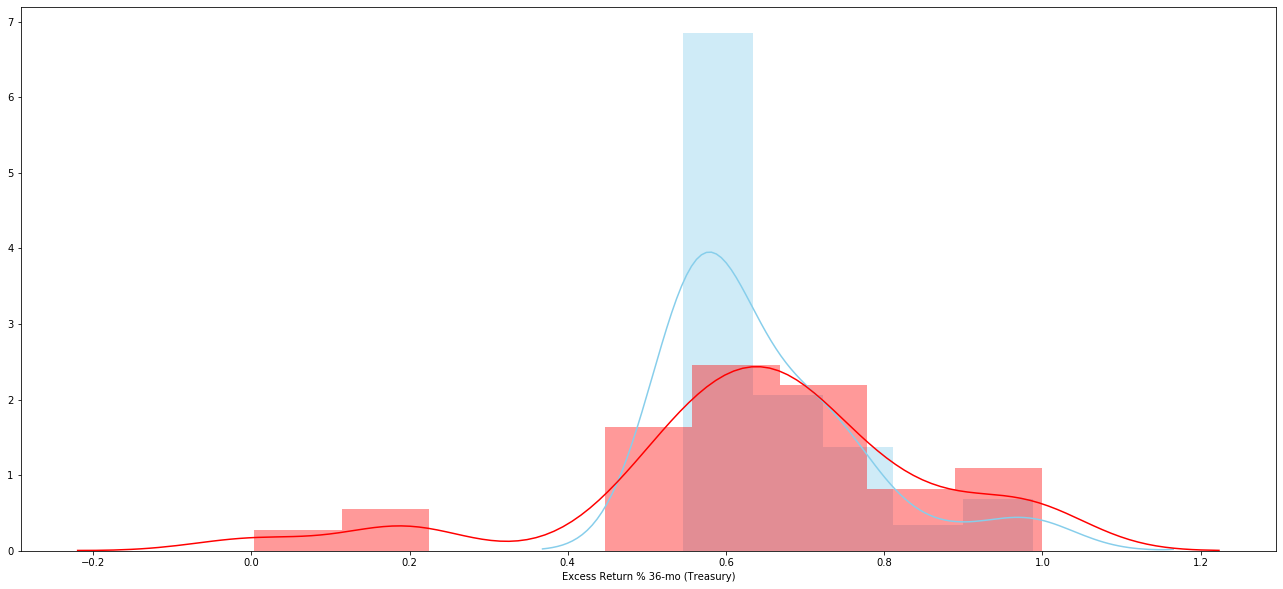

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  33.0  0.649403  0.119746  0.020845   0.606943   
 1  Excess Return % 36-mo (Agg)  33.0  0.460575  0.203047  0.035346   0.388577   
 2                     combined  66.0  0.554989  0.190807  0.023487   0.508083   
 
    Interval  
 0  0.691863  
 1  0.532572  
 2  0.601895  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.1888
 1                              Degrees of freedom =   64.0000
 2                                               t =    4.6017
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.1328
 7                                       Hedge's g =    1.1195
 8                                   Glass

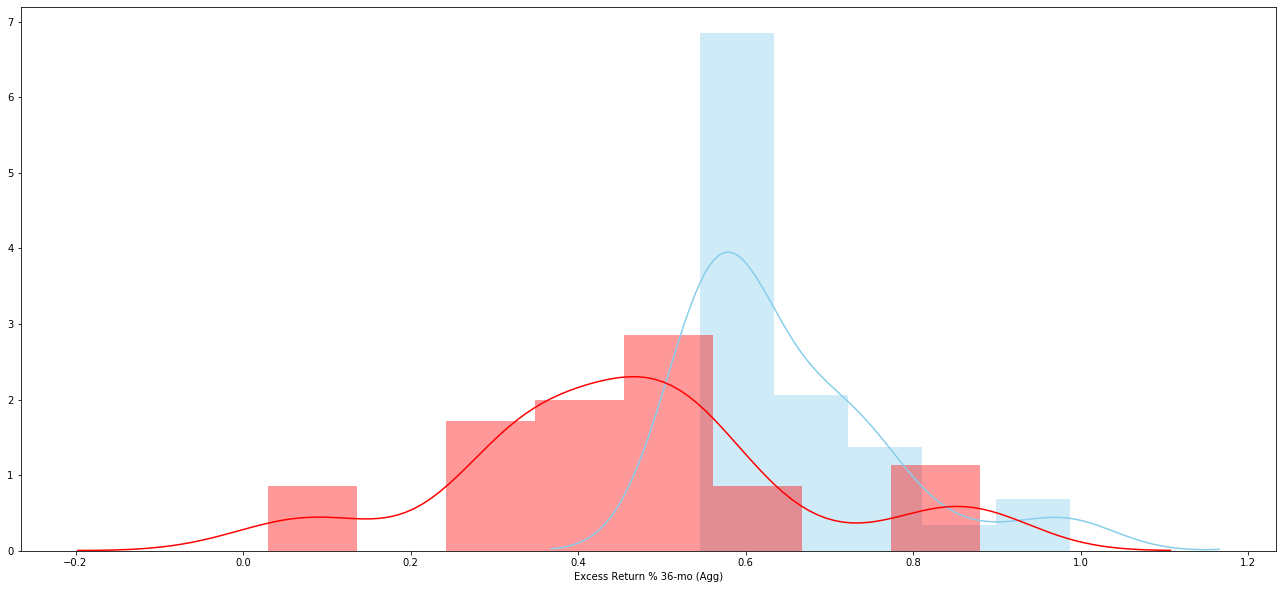

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_CMBS.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,267.000000,267.000000,267.000000,266.000000,266.000000,263.000000,263.000000,260.000000,260.000000,257.000000,257.000000,245.000000,245.000000,233.000000,233.000000,267.000000
mean,0.389551,0.497822,0.503905,0.508826,0.507331,0.502922,0.510516,0.503568,0.489132,0.511401,0.510328,0.513404,0.476935,0.502615,0.482371,2.528090
std,0.327368,0.255197,0.234098,0.260708,0.243181,0.274559,0.258519,0.283993,0.249247,0.276018,0.263561,0.296969,0.226476,0.312065,0.234052,1.062943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.129442,0.374333,0.376337,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.000000
50%,0.299492,0.494333,0.495460,0.510422,0.462486,0.493021,0.474618,0.501222,0.465767,0.519729,0.475128,0.491521,0.445444,0.483095,0.450922,3.000000
75%,0.472081,0.622111,0.625106,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 3-mo (Treasury)  266.0  0.508826  0.260708  0.015985   
 2                         combined  299.0  0.524341  0.252841  0.014622   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.477352  0.540300  
 2   0.495565  0.553117  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.1406
 1                              Degrees of freedom =   297.0000
 2                                               t =     3.0543
 3                           Two side test p value =     0.0025
 4                          Difference < 0 p value =     0.9988
 5                          Difference > 0 p value =     0.0012
 6                                       Cohen's d =     0.5637
 7                                       Hedge's g =     0.5623
 8           

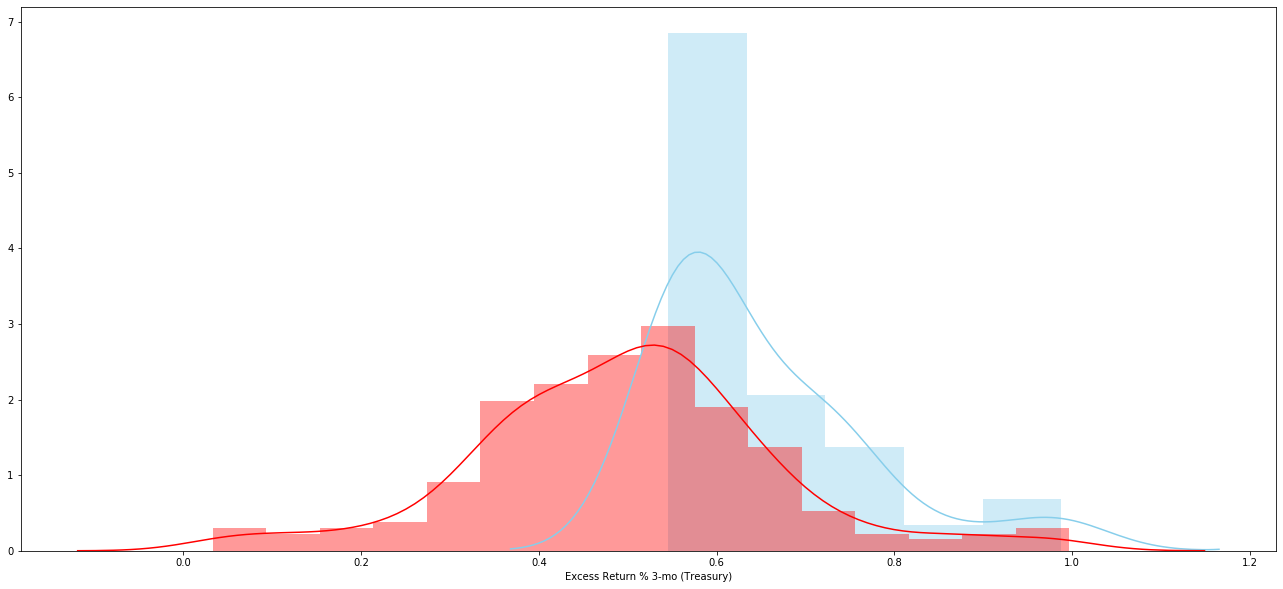

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   33.0  0.649403  0.119746  0.020845   0.606943   
 1  Excess Return % 3-mo (Agg)  266.0  0.507331  0.243181  0.014910   0.477974   
 2                    combined  299.0  0.523012  0.236889  0.013700   0.496051   
 
    Interval  
 0  0.691863  
 1  0.536689  
 2  0.549972  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.1421
 1                             Degrees of freedom =   297.0000
 2                                              t =     3.3032
 3                          Two side test p value =     0.0011
 4                         Difference < 0 p value =     0.9995
 5                         Difference > 0 p value =     0.0005
 6                                      Cohen's d =     0.6096
 7                                      Hedge's g =     0.6081
 8                                  Glass'

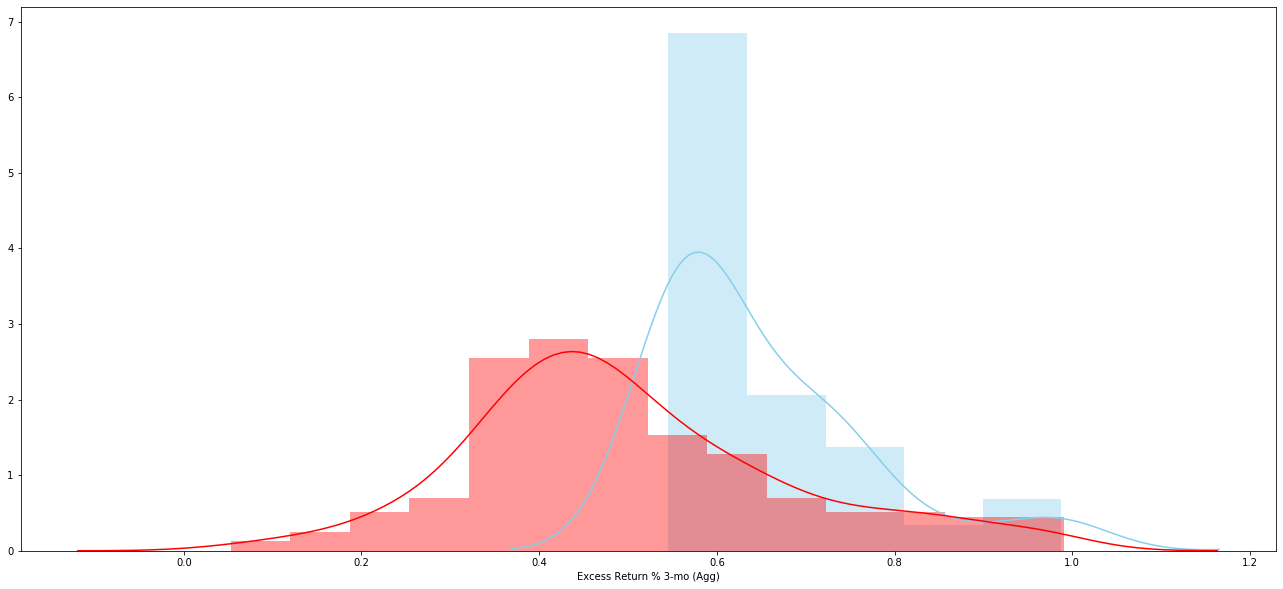

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 6-mo (Treasury)  263.0  0.502922  0.274559  0.016930   
 2                         combined  296.0  0.519252  0.265778  0.015448   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.469586  0.536258  
 2   0.488850  0.549655  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.1465
 1                              Degrees of freedom =   294.0000
 2                                               t =     3.0253
 3                           Two side test p value =     0.0027
 4                          Difference < 0 p value =     0.9986
 5                          Difference > 0 p value =     0.0014
 6                                       Cohen's d =     0.5587
 7                                       Hedge's g =     0.5573
 8           

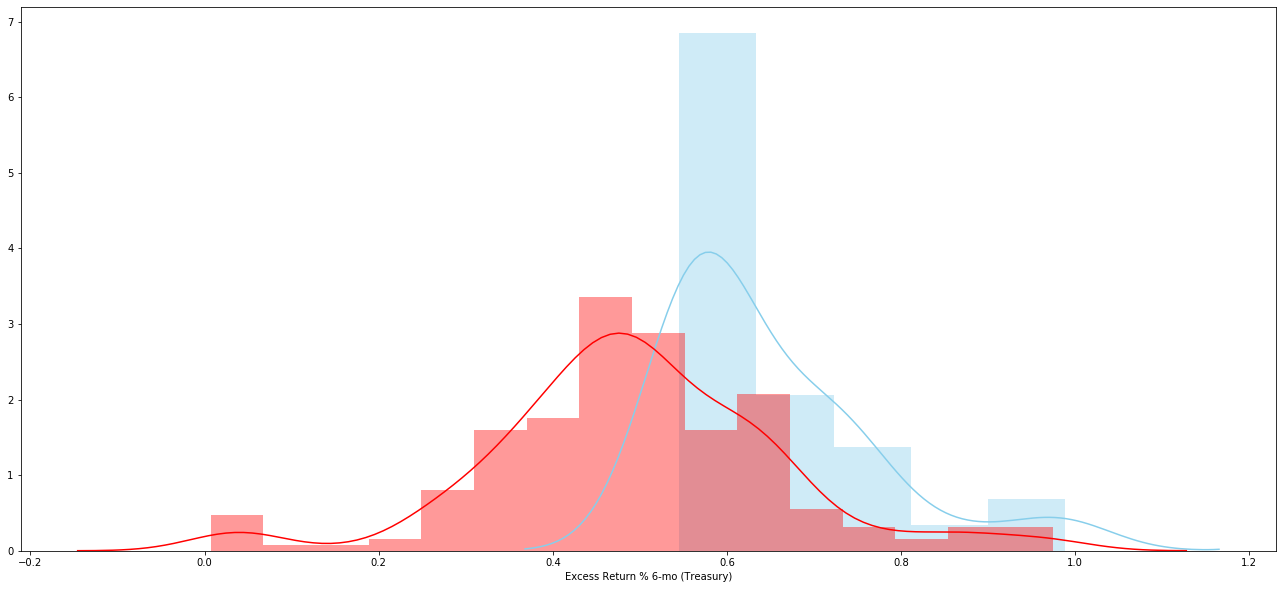

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   33.0  0.649403  0.119746  0.020845   0.606943   
 1  Excess Return % 6-mo (Agg)  263.0  0.510516  0.258519  0.015941   0.479127   
 2                    combined  296.0  0.526000  0.250657  0.014569   0.497327   
 
    Interval  
 0  0.691863  
 1  0.541904  
 2  0.554672  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.1389
 1                             Degrees of freedom =   294.0000
 2                                              t =     3.0420
 3                          Two side test p value =     0.0026
 4                         Difference < 0 p value =     0.9987
 5                         Difference > 0 p value =     0.0013
 6                                      Cohen's d =     0.5618
 7                                      Hedge's g =     0.5604
 8                                  Glass'

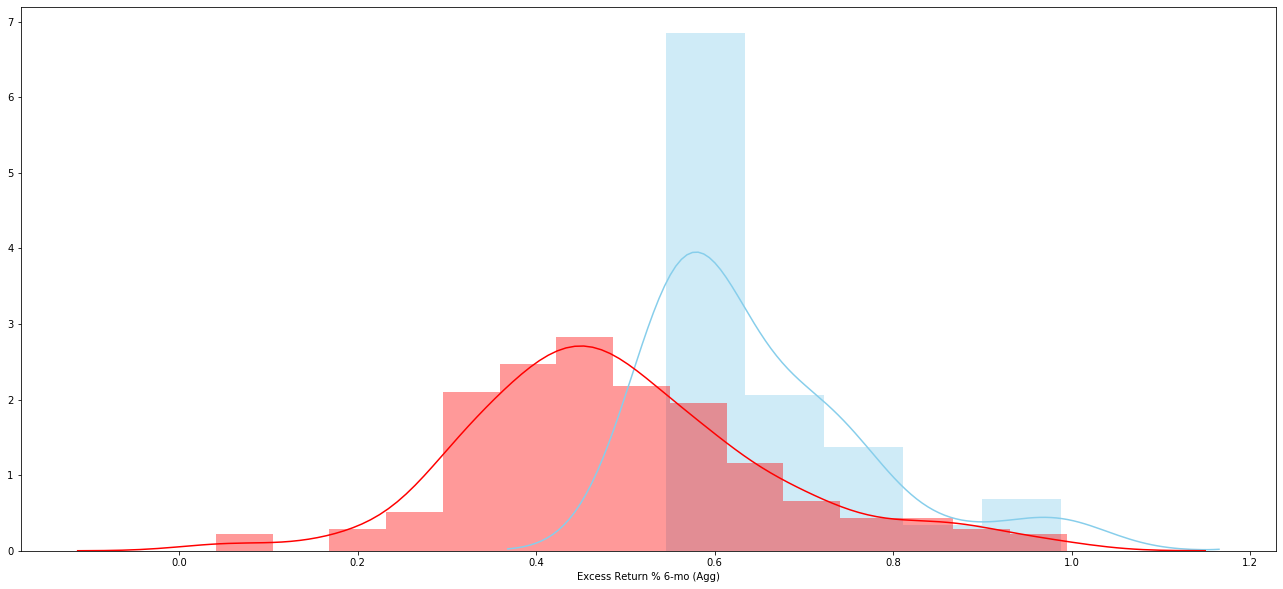

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 9-mo (Treasury)  260.0  0.503568  0.283993  0.017613   
 2                         combined  293.0  0.519993  0.274302  0.016025   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.468886  0.538250  
 2   0.488454  0.551532  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.1458
 1                              Degrees of freedom =   291.0000
 2                                               t =     2.9137
 3                           Two side test p value =     0.0038
 4                          Difference < 0 p value =     0.9981
 5                          Difference > 0 p value =     0.0019
 6                                       Cohen's d =     0.5384
 7                                       Hedge's g =     0.5370
 8           

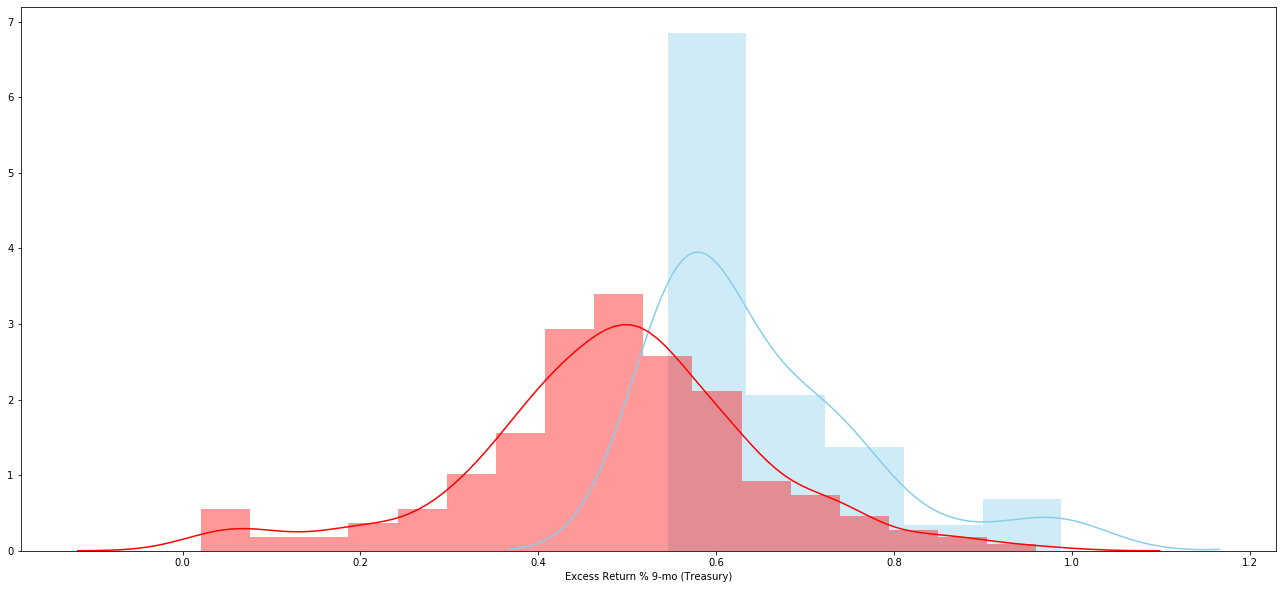

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   33.0  0.649403  0.119746  0.020845   0.606943   
 1  Excess Return % 9-mo (Agg)  260.0  0.489132  0.249247  0.015458   0.458693   
 2                    combined  293.0  0.507183  0.243414  0.014220   0.479195   
 
    Interval  
 0  0.691863  
 1  0.519570  
 2  0.535170  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.1603
 1                             Degrees of freedom =   291.0000
 2                                              t =     3.6369
 3                          Two side test p value =     0.0003
 4                         Difference < 0 p value =     0.9998
 5                         Difference > 0 p value =     0.0002
 6                                      Cohen's d =     0.6721
 7                                      Hedge's g =     0.6703
 8                                  Glass'

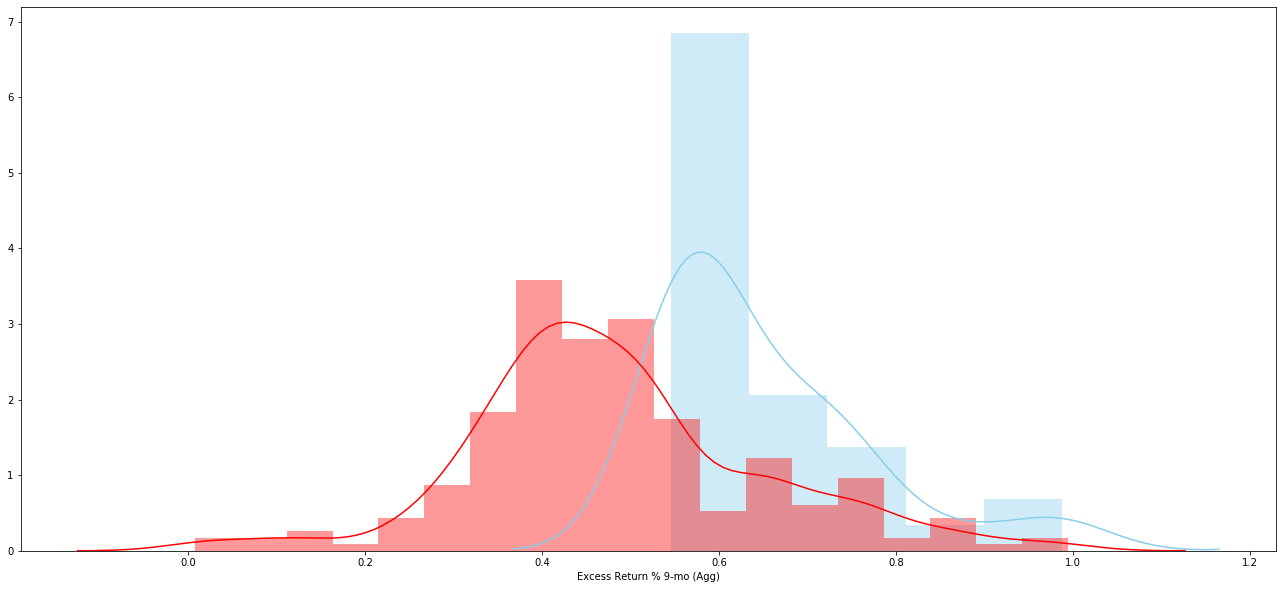

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 12-mo (Treasury)  257.0  0.511401  0.276018  0.017217   
 2                          combined  290.0  0.527105  0.266460  0.015647   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.477495  0.545307  
 2   0.496308  0.557901  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.1380
 1                              Degrees of freedom =   288.0000
 2                                               t =     2.8347
 3                           Two side test p value =     0.0049
 4                          Difference < 0 p value =     0.9975
 5                          Difference > 0 p value =     0.0025
 6                                       Cohen's d =     0.5242
 7                                       Hedge's g =     0.5228
 8       

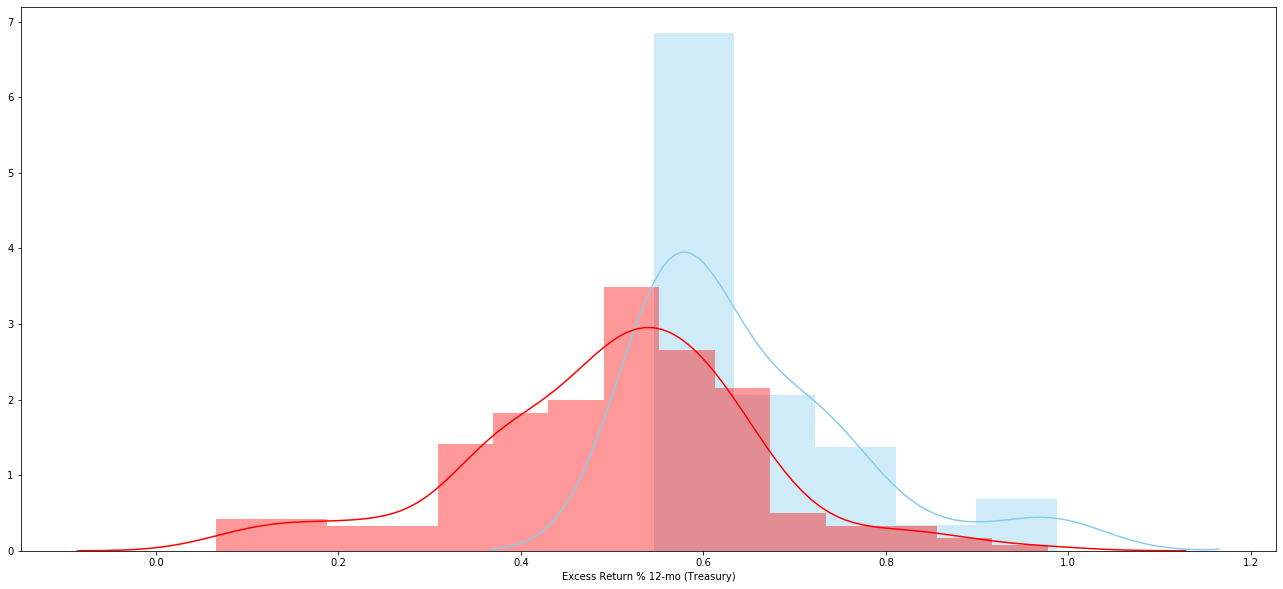

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 12-mo (Agg)  257.0  0.510328  0.263561  0.016440   
 2                     combined  290.0  0.526154  0.255103  0.014980   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.477952  0.542704  
 2   0.496670  0.555638  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.1391
 1                              Degrees of freedom =   288.0000
 2                                               t =     2.9884
 3                           Two side test p value =     0.0030
 4                          Difference < 0 p value =     0.9985
 5                          Difference > 0 p value =     0.0015
 6                                       Cohen's d =     0.5526
 7                                       Hedge's g =     0.5512
 8                           

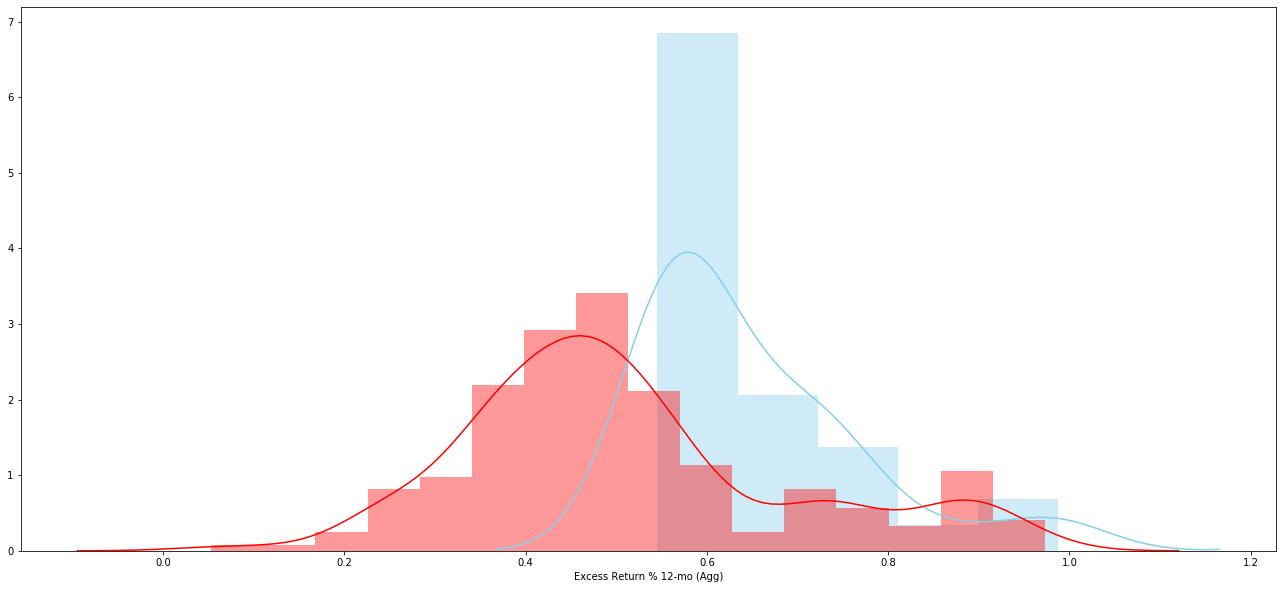

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 24-mo (Treasury)  245.0  0.513404  0.296969  0.018973   
 2                          combined  278.0  0.529548  0.285101  0.017099   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.476033  0.550775  
 2   0.495887  0.563209  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.1360
 1                              Degrees of freedom =   276.0000
 2                                               t =     2.5991
 3                           Two side test p value =     0.0098
 4                          Difference < 0 p value =     0.9951
 5                          Difference > 0 p value =     0.0049
 6                                       Cohen's d =     0.4820
 7                                       Hedge's g =     0.4806
 8       

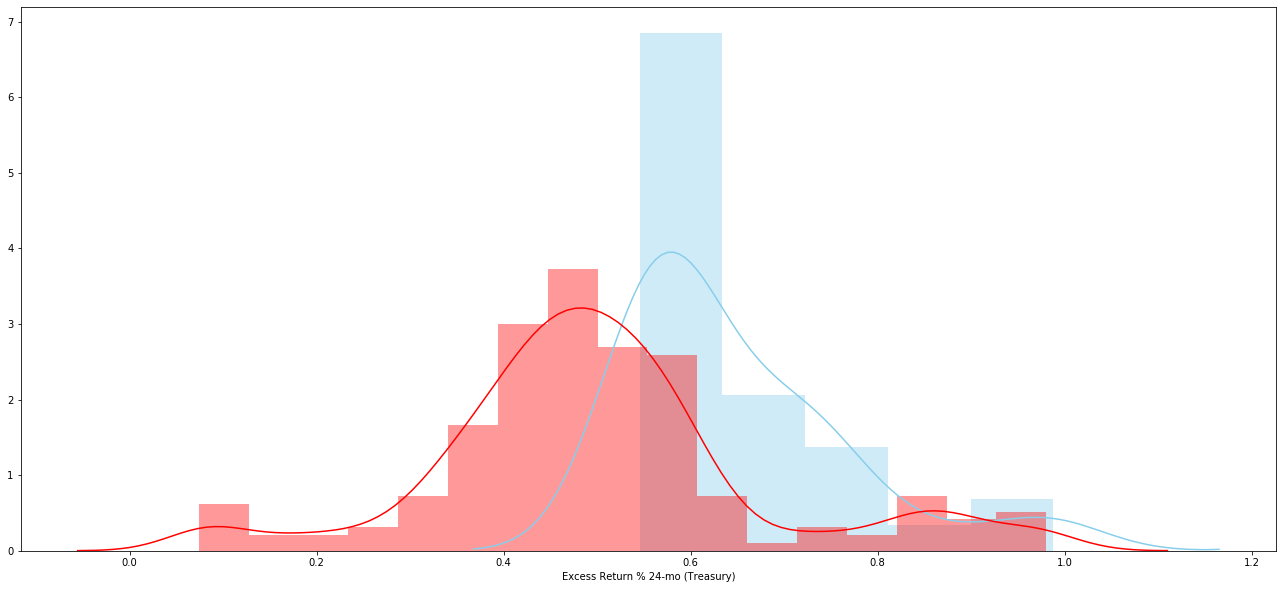

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 24-mo (Agg)  245.0  0.476935  0.226476  0.014469   
 2                     combined  278.0  0.497407  0.223518  0.013406   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.448434  0.505435  
 2   0.471017  0.523798  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.1725
 1                              Degrees of freedom =   276.0000
 2                                               t =     4.2899
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.7955
 7                                       Hedge's g =     0.7933
 8                           

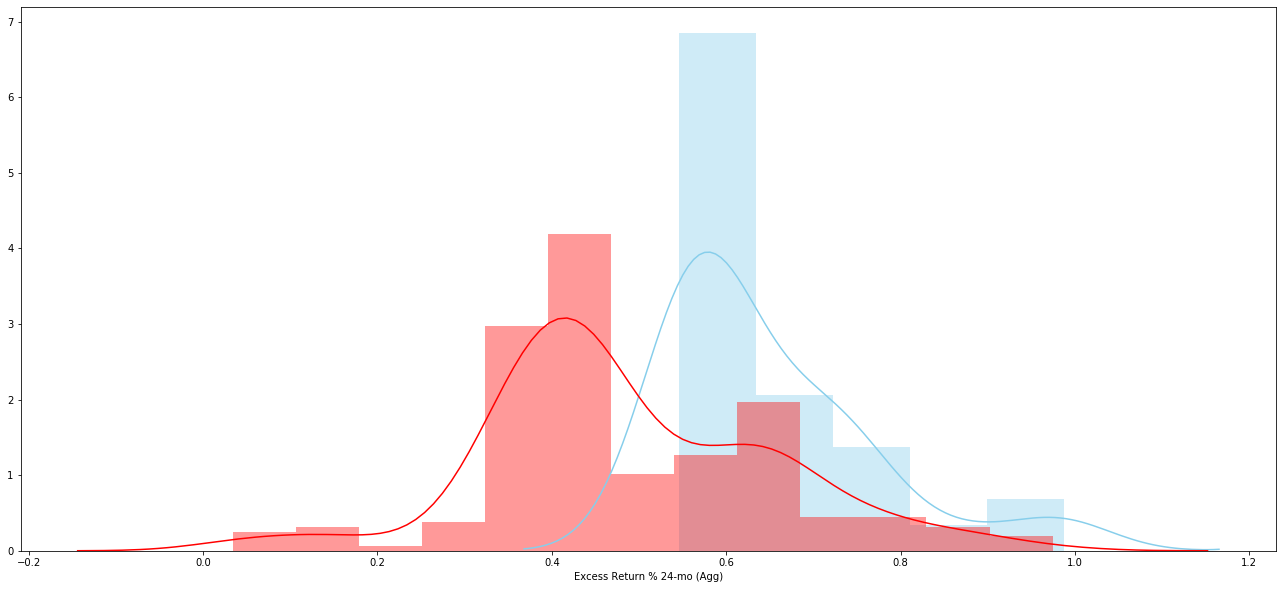

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 36-mo (Treasury)  233.0  0.502615  0.312065  0.020444   
 2                          combined  266.0  0.520825  0.298897  0.018327   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.462335  0.542895  
 2   0.484741  0.556910  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.1468
 1                              Degrees of freedom =   264.0000
 2                                               t =     2.6707
 3                           Two side test p value =     0.0080
 4                          Difference < 0 p value =     0.9960
 5                          Difference > 0 p value =     0.0040
 6                                       Cohen's d =     0.4968
 7                                       Hedge's g =     0.4953
 8       

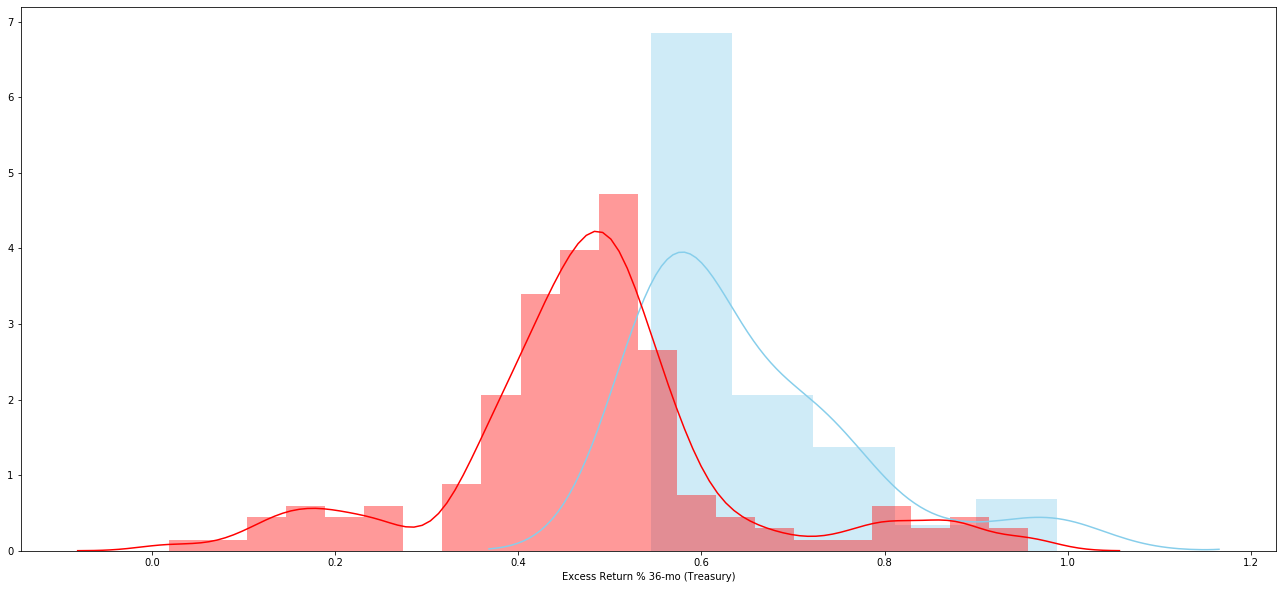

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   33.0  0.649403  0.119746  0.020845   
 1  Excess Return % 36-mo (Agg)  233.0  0.482371  0.234052  0.015333   
 2                     combined  266.0  0.503093  0.229637  0.014080   
 
    95% Conf.  Interval  
 0   0.606943  0.691863  
 1   0.452161  0.512581  
 2   0.475370  0.530816  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.1670
 1                              Degrees of freedom =   264.0000
 2                                               t =     4.0210
 3                           Two side test p value =     0.0001
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.7479
 7                                       Hedge's g =     0.7458
 8                           

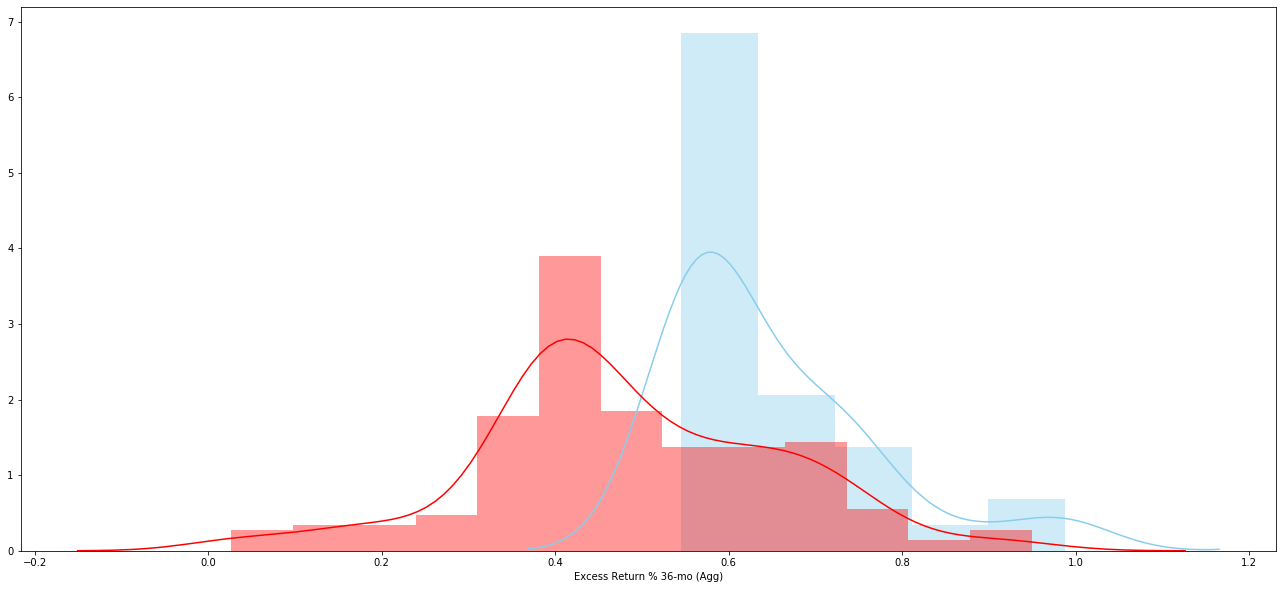

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")